# Neurális hálózatok

A neurális hálózatok az emberi agy rendkívül leegyszerűsített modelljén alapulnak. Közös jellemzőjük, hogy a bemementet valamilyen feldolgozás alapján kimenetté alakítják át. Számos "neuronból", azaz számítási egységből állnak, amelyek együttesen valósítják meg a kívánt működést.

Neurális hálózatoknak (NH) nevezzük azokat a párhuzamos információfeldolgozásra alkalmas eszközöket, amelyek [Altrichter, Horváth, Pataki, Strausz, Takács, Valyon (2006): Neurális hálózatok ](http://project.mit.bme.hu/mi_almanach/books/neuralis/index) szerint

* azonos vagy hasonló típusú, összekapcsolt műveleti elemekből ("neuronok") állnak
* rendelkeznek tanulási algoritmussal
* rendelkeznek a megtanult információt előhívó algoritmussal

## Mire használhatók?

* **Osztályozás**
   * minta azonosítása, jellegzetességek felismerése, képillesztés

* **Zajcsökkentés**
   * mintázat felismerése a bemenetben és zaj nélküli kimenet előállítása
   
* **Predikció**
   * korábbi adatokon alapuló extrapoláció
   
A következőkben felsoroljuk - a teljesség igénye nélkül - a neurális hálózatok (NH) néhány jellemző felhasználási területét.

* **Adattal címezhető memória**
  * A hálózatot úgy tanítjuk, hogy azonos címhez rendelje az összetartozó adatokat. Előhíváskor a bementre adott adatra valamely megtanult címet adja vissza a hálózat.
  
* **Asszociatív memória**
  * A hálózatnak ebben az esetben is valamilyen adatot tanítunk, de itt cím helyett a kimeneten is adatot várunk.
  
* **Osztályozási feladatok**
  * Adott egy mintahalmaz, amelynek elemei különböző osztályokba sorolhatóak. Például írott szövegből kell az egyes karaktereket felismerni. Célunk a rendelkezésre álló minták alapján a hálózatot megtanítani arra, hogy az egyes írott karaktereket helyesen ismerje fel. Sok esetben azonban nem ismeretes, hogy melyik mintát hova kell sorolni, ilyenkor a hálózatnak magának kell összefüggéseket keresnie az egyes minták között, és megtanulni őket.
  
* **Optimalizálási feladatok**
  * A feladat valamilyen költségfüggvény optimalizálása. A neurális hálózatot úgy alakítjuk ki, hogy a megoldandó probléma paramétereit tartalmazza. A ilyen célra létrehozott hálózatok általában visszacsatolt struktúrák.
  
* **Approximálási feladatok**
  * Rendelkezünk adatokkal, például mérési adatokkal valamilyen probléma esetében, de nem tudjuk az adatok által leírt függvény jellemzőit, és azok analitikus úton nehezen, vagy egyáltalán nem határozhatóak meg.
  
* **Nemlineáris dinamikus rendszer**
  * különböző idősorokat kell elemezni, és előrejelezni a következő értékeket.
  


## Neuronok

A NH alapelemei a "neuronok" (számítási elemek vagy csomópontok). Egy elem több bemenettel és kimenettel rendelkezik. A számítási elem meghatározza a bemeneti komponensek súlyozott összegét, és ezen végrehajt valamilyen nem lineáris leképezést. Ez a leképezés az aktivációs vagy transzfer függvény. Az ábrán ![](neuron.png) 

az elem bemeneteit $x_i$ jelöli, a kimeneti jel pedig $y$. Először a bemeneti jelek súlyozott összegei lesznek meghatározva:

$$ s=\sum_{i=0}^{N}w_i \cdot x_i = w^T \cdot x.$$

Ezután az aktivációs függvény állítja elő az elem kimeneti jelét

$$y=f(s)=f(w^T \cdot x),$$

ahol $f(s)$ az aktivációs függvény. Erre a célra többféle függvénytípus használata is elterjedt. A leggyakrabban alkalmazottak a tangens hiperbolikusz és a logisztikus (S-alakú, szigmoid) függvény.

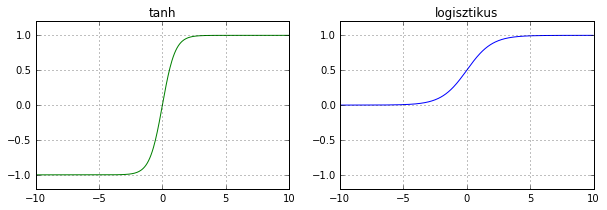

In [1]:
import numpy as np
from __future__ import unicode_literals

def tanh(x):
    return np.tanh(x)

def tanh_deriv(x):
    return 1.0 - np.tanh(x)**2

def logistic(x):
    return 1/(1 + np.exp(-x))

def logistic_derivative(x):
    return logistic(x)*(1-logistic(x))

## ábrázoljuk
import matplotlib.pyplot as plt
%matplotlib inline
s=np.arange(-10,10,0.05)
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(s,tanh(s),'g-')
plt.grid(True)
plt.ylim(-1.2,1.2)
plt.title('tanh')
plt.subplot(122)
plt.plot(s,logistic(s))
plt.grid(True)
plt.ylim(-1.2,1.2)
plt.title('logisztikus')
plt.show()

## Hálózatok

A NH az előzőkben ismertetett "neuronokból" épülnek fel. Közöttük egy meghatározott szerkezeti kapcsolat, topológia szerinti összeköttetések vannak. A NH-kat az összeköttetési rendszer szerint *előrecsatolt* vagy *visszacsatolt* hálózatnak nevezzük. Visszacsatoltnak nevezünk egy neurális hálót, ha a topológiáját reprezentáló irányított gráf tartalmaz hurkot, egyébként a neurális háló előrecsatolt. 

A számítási egységeket sok esetben *rétegek*be szervezzük, ahol egy rétegbe hasonló típusú csomópontok tartoznak. Az egy rétegbe tartozó egységekre még az is jellemző, hogy kapcsolataik is hasonlók. Az azonos rétegbe tartozó egységek mindegyikének bemenetei a teljes hálózat bemenetei, vagy egy másik réteg egységeinek kimeneteihez kapcsolódnak, kimenetei pedig ugyancsak egy másik réteg egységeinek a bemeneteit képezik, vagy a teljes hálózat kimeneteit alkotják. Ennek megfelelően beszélhetünk bemeneti rétegről , rejtett réteg(ek)ről és kimeneti rétegről. A bemeneti réteg, amely puffer jellegű csomópontokból épül fel, információfeldolgozást nem végez, feladata csupán a háló bemeneteinek a következő réteg bemeneteihez való eljuttatása. Ennek megfelelően egy rétegekbe szervezett háló legalább két réteggel, egy bemeneti és egy kimeneti réteggel kell rendelkezzen. E két réteg között elvben tetszőleges számú rejtett réteg helyezkedhet el.

Az azonos rétegekben elhelyezkedő csomópontok nincsenek egymással kapcsolatban, ez ad lehetőséget a párhuzamos feldolgozásra. A következő ábra egy rejtett régeget tartalmazó hálózatot ábrázol ([Zaletnyik P. (2003): Neurális hálózatok alkalmazása a geodéziában](http://www.agt.bme.hu/staff_h/zaletnyik/ZP_diploma.pdf) c. diplomamunkája alapján ). ![](NH.png)

A bemeneti rétegen szoktak még egy konstans bemenetet (eltolást) biztosító további csomópontot is alkalmazni.

A következőkben létrehozunk egy egyszerű Python osztályt a NH modellezésére. Az osztály konstruktorában beállítjuk az egyes rétegekben levő csomópontok számát, véletlenszerűen választott, -0.25 és 0.25 közötti súlyokat rendelünk a csomópontokhoz és beállítjuk az egységek aktivációs függvényét. Az utolsó kivételével mindegyik régekben lesz egy eltolást biztosító csomópont, amelyik az aktivációs küszöb beállítására szolgál.

In [2]:
class NeuralNetwork:
    def __init__(self, layers, activation='tanh'):
        """
        :param layers: Az egyes rétegekben levő csomópontok számának listája.
        Legalább két értéket kell tartalmaznia
        :param activation: A beállított aktivációs függvény: "logistic" vagy "tanh"
        """
        if activation == 'logistic':
            self.activation = logistic
            self.activation_deriv = logistic_derivative
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_deriv = tanh_deriv

        self.weights = []
        for i in range(1, len(layers) - 1):
            self.weights.append((2*np.random.random((layers[i - 1] + 1, layers[i]
                                + 1))-1)*0.25)
        self.weights.append((2*np.random.random((layers[i] + 1, layers[i +
                            1]))-1)*0.25)
        
    def fit(self, X, y, learning_rate=0.2, epochs=10000):
        X = np.atleast_2d(X)
        temp = np.ones([X.shape[0], X.shape[1]+1])
        temp[:, 0:-1] = X  # eltolási egység hozzáadása a bemeneti réteghez
        X = temp
        y = np.array(y)

        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            a = [X[i]]

            for l in range(len(self.weights)):
                a.append(self.activation(np.dot(a[l], self.weights[l])))
            error = y[i] - a[-1]
            deltas = [error * self.activation_deriv(a[-1])]

            for l in range(len(a) - 2, 0, -1): # az utolsó előtti rétegben kell elkezdenünk
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_deriv(a[l]))
            deltas.reverse()
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)
                
    def predict(self, x):
        x = np.array(x)
        temp = np.ones(x.shape[0]+1)
        temp[0:-1] = x
        a = temp
        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a

## Hálózatok tanítása

A NH-k fontos tulajdonsága a tanulási vagy adaptációs képesség. Ez azt jelenti, hogy a hálózat a tanulás során képes módosítani a paramétereit annak érdekében, hogy egy kívánt célt, működést elérjen.

A legáltalánosabban alkalmazott tanítási eljárás az ún. *hibavisszaterjesztéses* (backpropagation) algoritmus. Ez két lépésből áll:

1. előretartó számítás, melynek során a tanító adatokat felhasználva számítjuk a hálózat kimenetét
2. visszafelé tartó számítás, melynek során a kimenetből kiindulva minden csomópont hibáját meghatározzuk és ennek segítségével módosítjuk a hálózat súlyait

A visszaterjesztéses algoritmust programoztuk Python-ban, az osztály `fit()` tagfüggvényében. Miután adottak az `X` bemeneti vektorok és `y` kimeneti értékek, módosítjuk ennek megfelelően a hálózat súlyait. A felhasznált algoritmust sztochasztikus gradiens csökkentésnek hívják. Kiválasztunk egy véletlen mintát a tanító adatokból, visszaterjesztést végzünk a minta alapján és ezt többször megismételjük. Az algoritmus tanulási aránytényezőjét (`learning_rate`) is be kell állítanunk, amely azt mondja meg, hogy a hibákkal arányosan az egyes lépések (epochák) során mennyit változnak a súlyok.


## Predikció

A predikció számítása teljesen hasonló a visszaterjesztéses algoritmus első lépéséhez, annyi különbséggel, hogy most nem kell az egyes csomópontok aktivációs értékeit tárolnuk, csak az utolsót. Ezt az osztály `predict()` tagfüggvénye valósítja meg.

## Számítási példák

### XOR függvény

Az XOR függvény lineárisan nem szétválasztható. Ez azt jelenti, hogy ha a síkon ábrázoljuk a függvényt, akkor egy egyenessel nem tudjuk szétválasztani a különböző (0 és 1) függvény értékeket. Ezért legalább egy rejtett réteget kell használnuk. A példában a réteg 2 egységből áll.

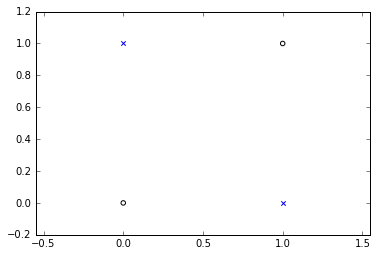

In [3]:
X = []
y = []
for i in range(2):
    for j in range(2):
        X.append([i, j])
        y.append(i ^ j)
for i in range(len(y)):
    if y[i] == 1:
        plt.scatter(X[i][0], X[i][1], marker=u'x')
    elif y[i] == 0:
        plt.scatter(X[i][0], X[i][1], marker=u'o', facecolors='none')
plt.axis('equal')
plt.show()

In [4]:
nn = NeuralNetwork([2,2,1], 'tanh')
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])
nn.fit(X, y)
for i in [[0, 0], [0, 1], [1, 0], [1,1]]:
    print(i,nn.predict(i))

([0, 0], array([ 0.00056228]))
([0, 1], array([ 0.99841574]))
([1, 0], array([ 0.9983608]))
([1, 1], array([ 0.01096149]))


A hálózatunk egészen jól működik. Amennyiben a `tanh` aktivációs függvényt kicseréltük volna lépcsős aktivációs függvényre, akkor teljesen pontos eredményeket kaptunk volna. Ezután nézzünk egy bonyolultabb példát.

### Kézzel írt számjegyek felismerése

A kézzel írt számjegyek adatbázisa a [scikit-learn](http://scikit-learn.org) csomagban 1797 8x8 pixeles számjegy képet és az értékeiket tartalmazza. Nézzük, milyen pontosan tudjuk ezeket felismerni. Az értékeiket (mint pl. 1 vagy 5) 10 elemű vektorokká kell transzformálnunk, melynek komponensei mind zérusok, kivéve a számjegy értékének megfelelőt, ami 1.

In [5]:
from sklearn.cross_validation import train_test_split 
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelBinarizer

digits = load_digits()
X = digits.data
y = digits.target
X -= X.min() # normalize the values to bring them into the range 0-1
X /= X.max()

nn = NeuralNetwork([64,100,10],'tanh')
X_train, X_test, y_train, y_test = train_test_split(X, y)
labels_train = LabelBinarizer().fit_transform(y_train)
labels_test = LabelBinarizer().fit_transform(y_test)

nn.fit(X_train,labels_train,epochs=30000)
predictions = []
for i in range(X_test.shape[0]):
    o = nn.predict(X_test[i] )
    predictions.append(np.argmax(o))
print confusion_matrix(y_test,predictions)
print classification_report(y_test,predictions)

[[47  0  0  0  0  0  0  0  0  0]
 [ 0 22  0  0  7  0  9  0  0  5]
 [ 0  0 29  9  0  0  0  0  0  8]
 [ 0  0  0 29  0  6  2  0  0  6]
 [ 0  0  0  0 46  0  0  0  0  2]
 [ 1  0  0  0  0 54  0  0  0  2]
 [ 0  0  0  0  0  0 41  0  0  1]
 [ 0  0  0  2  1  3  0 37  0  2]
 [ 0  0  0  1  0  0  4  0  1 34]
 [ 1  0  0  0  0  4  0  0  0 34]]
             precision    recall  f1-score   support

          0       0.96      1.00      0.98        47
          1       1.00      0.51      0.68        43
          2       1.00      0.63      0.77        46
          3       0.71      0.67      0.69        43
          4       0.85      0.96      0.90        48
          5       0.81      0.95      0.87        57
          6       0.73      0.98      0.84        42
          7       1.00      0.82      0.90        45
          8       1.00      0.03      0.05        40
          9       0.36      0.87      0.51        39

avg / total       0.85      0.76      0.74       450



Eredményül megkaptuk a hibamátrixot (confusion matrix) és az egyes számjegyek felismerésének pontosságát tartalmazó jelentést. Az átlagos felismerési pontosság most 87%-os, de ez minden egyes futás után kismértékben változhat.

## Önszervező térkép (SOM)

Az agy komplex adatstruktúrák belső modellezésénél térbeli leképzést használ. Teuvo Kohonen ezt az ötletet használta fel, amikor a róla elnevezett hálózatot kialakította. A térbeli leképezés biztosítja azt is, hogy a hálózat adatokat tároljon olyan módon, hogy a tanító adatok térbeli és topológiai kapcsolatait megtartsuk.

A Kohonen hálót Kohonen térképnek, vagy *önszervező térkép*nek (Kohonen map, self-organizing map, *SOM*) hívjuk, ha a bemeneti minták topológiai kapcsolatait is megőrzi: hasonló bemeneti mintákra egymáshoz geometriailag közelálló neuronok válaszolnak győztesként. (Ehhez az kell, hogy a Kohonen háló processzáló elemei között is értelmezni lehessen szomszédsági viszonyokat. A Kohonen térkép esetén a neuronok általában vagy egy vonal mentén vagy egy síkban vannak elrendezve, ahol a szomszédság definiálható.)

A Kohonen háló alapeleme egy lineáris összegző funkciót megvalósító csomópont; a csomópontok egyetlen rétegben, általában egy sík rácspontjaiban vannak elhelyezve. Minden bemenet a hálózat összes csomópontjához kapcsolódik. A hálózatban nemcsak előrecsatolást megvalósító súlyok, hanem visszacsatolás is található, ez azonban a közvetlen szomszédos csomópontokkal való oldalsó összekötésekre korlátozódik. A háló további jellemzője, hogy nincs különálló kimeneti réteg − a rács minden egyes csomópontja egyben kimeneti csomópont is. 

A háló egyes kimenetei a bemeneti komponensek súlyozott összegei, vagyis a háló a bemenetek és a kimenetek között lineáris kapcsolatot valósít meg:

$$ y_i=\sum_{j=0}^{N}w_{ij} x_j.$$

Az oldalirányú kapcsolatok rögzítettek; jellegük gerjesztő, ha egy csomópont önmagára való visszacsatolásáról van szó és gátló a többi esetben. A Kohonen háló megfelelő működéséhez is szükség van a súlyok kezdeti beállítására és a tanulási tényező megválasztására. A Kohonen háló súlymódosítása a versengés felhasználásán alapul. Ez azt jelenti, hogy nem módosítjuk a hálózat összes súlyát, hanem csak a győztes csomópontét. Egy adott bemenet mellett győztes az a csomópont, amelyik a legnagyobb kimenetet produkálja.



### Osztályozás színek alapján

Nézzünk egy példát a SOM alapján végzett osztályozásra. Ehhez a [MiniSom](https://github.com/JustGlowing/minisom) osztályt használjuk, melynek némiképpen módosított implementációja a [minisom.py](minisom.py) modulban található. A kép az Alberta tartományban erdőtűz előtti, 2016. április 17-én készült [Landsat 8 felvétel](http://remotesensing.usgs.gov/gallery/gallery.php?cat=2#523). Az 1066 x 600-as méretű kép feldolgozása kb. 20 másodpercet igényel.

tanítás...
osztályozás...
új kép készítése...
kész.


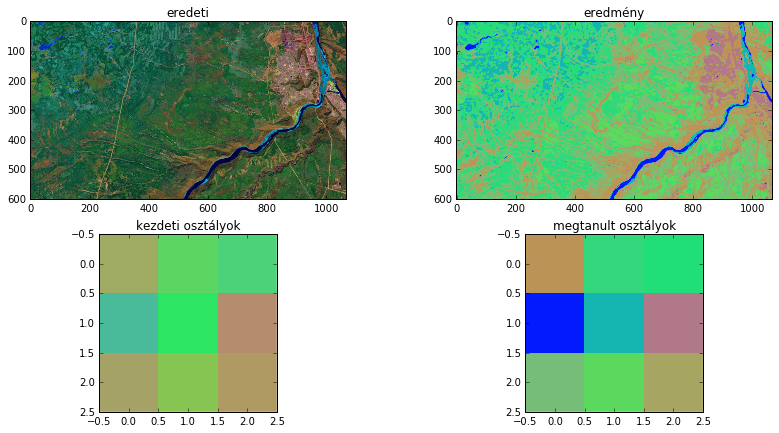

In [6]:
from minisom import MiniSom

# a kép beolvasása (1066 x 600)
img = plt.imread('fire.jpg')

# a pixel mátrix átméretezése
pixels = np.reshape(img,(img.shape[0]*img.shape[1],3))

# SOM indítása és tanítása
print('tanítás...')
som = MiniSom(3,3,3,sigma=0.1,learning_rate=0.2) # 3x3 = 9 szín
som.random_weights_init(pixels)
starting_weights = som.weights.copy() # a kezdő súlyok megjegyzése
som.train_random(pixels,100)

print('osztályozás...')
qnt = som.quantization(pixels) # a kép pixeleinek osztályozása
print('új kép készítése...')
clustered = np.zeros(img.shape)
for i,q in enumerate(qnt): # az osztályozott kép előállítása
    clustered[np.unravel_index(i,dims=(img.shape[0],img.shape[1]))] = q
print('kész.')

# az eredmény megjelenítése
plt.figure(figsize=(14,7))
plt.subplot(221)
plt.title('eredeti')
plt.imshow(img)
plt.subplot(222)
plt.title('eredmény')
plt.imshow(clustered)

plt.subplot(223)
plt.title('kezdeti osztályok')
plt.imshow(starting_weights,interpolation='none')
plt.subplot(224)
plt.title('megtanult osztályok')
plt.imshow(som.weights,interpolation='none')

plt.show()

### Kézzel írt számjegyek felismerése

A korábban már felhasznált `digits` számjegy adatrendszerre alkalmazzuk az önszervező térkép alapú osztályozást (felismerést). Először tanítjuk a SOM hálózatot 3000 véletlenszerűen kiválasztott adattal.

In [7]:
data = digits.data # mátrix, melynek mindegyik sora egy számjegyet képviselő vektor
num = digits.target # num[i] a data[i]-ben levő számjegy

# a SOM tanítása
from minisom import MiniSom
som = MiniSom(20,20,64,sigma=.8,learning_rate=0.5)
print("tanítás...")
som.train_random(data,3000) # tanítás véletlenszerűen választott adatokkal
print("\n...kész!")

tanítás...

...kész!


A tanítás eredményét ábrázolhatjuk. Az első ábrán az egyes képekhez felismert számjegyeket láthatjuk. A helyzete a nyertes "neuron" helyzetének megfelelő. A második ábrán az eredeti képeket láthatjuk.

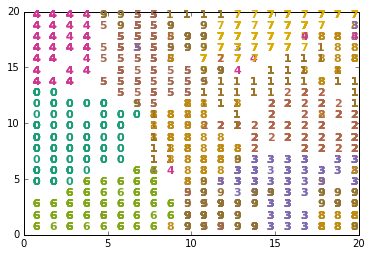

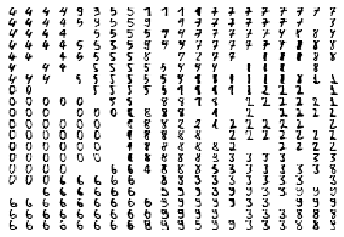

In [10]:
# az eredmények ábrázolása
wmap = {}
plt.figure(1)
im = 0
for x,t in zip(data,num): # szórt pontok ábrája
    w = som.winner(x)
    wmap[w] = im
    plt.text(w[0]+.5, w[1]+.5, str(t), color=plt.cm.Dark2(t / 10.), fontdict={'weight': 'bold', 'size': 11})
    im = im + 1
plt.axis([0,som.weights.shape[0],0,som.weights.shape[1]])

plt.figure(2,facecolor='white')
cnt = 0
for j in reversed(range(20)): # képekből álló mozaik
    for i in range(20):
        plt.subplot(20,20,cnt+1,frameon=False, xticks=[], yticks=[])
        if (i,j) in wmap:
            plt.imshow(digits.images[wmap[(i,j)]], cmap='Greys',  interpolation='nearest')
        else:
            plt.imshow(np.zeros((8,8)), cmap='Greys')
        cnt = cnt + 1

plt.show()